# Business Objective:
This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
df=pd.read_csv('bankruptcy-prevention.csv',sep=';')

In [3]:
df.head(4)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy


In [4]:
df.tail(4)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


## Exploratory Data Analysis
Now we will check the following points for data validation

#### 1.Typing errors

#### 2. Null values

#### 3.Duplicates values

#### 4.Label Encoder

#### 5.Visualization

In visualization we explore Distribution of data, outliers detection and replacement, Use Boxplot, Density plot, Histogram to get more detail regarding concentration, distribution, skewness, outliers, range etc of data. Also Check the Correlation between the variables and Use scatterplot.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [6]:
df.shape

(250, 7)

In [7]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Stripping Space
columns=[]
for col in df.columns:
     print(col)
     col=col.strip()
     columns.append(col)
        
df.columns=columns
print(col)

industrial_risk
 management_risk
 financial_flexibility
 credibility
 competitiveness
 operating_risk
 class
class


In [9]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [10]:
df.nunique()

industrial_risk          3
management_risk          3
financial_flexibility    3
credibility              3
competitiveness          3
operating_risk           3
class                    2
dtype: int64

In [11]:
df['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [12]:
# checking duplicate values
df_bank = df[df.duplicated(keep=False)].sort_values(['class', 'industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'operating_risk'])
df_bank.shape

(221, 7)

In [13]:
bank_unique_records = df.drop_duplicates(keep= False)
bank_unique_records.shape

(29, 7)

In [14]:
bank_unique_records

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
27,0.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
36,1.0,1.0,0.0,1.0,0.0,0.0,bankruptcy
72,1.0,0.5,1.0,0.5,0.0,0.0,bankruptcy
142,0.0,1.0,1.0,1.0,0.5,1.0,non-bankruptcy
143,1.0,0.0,1.0,0.5,1.0,0.5,non-bankruptcy
144,0.5,1.0,0.5,1.0,1.0,0.5,non-bankruptcy
145,0.5,0.0,1.0,0.5,0.5,0.5,non-bankruptcy
146,0.5,0.5,0.5,1.0,0.5,0.0,non-bankruptcy
147,0.5,0.5,0.5,0.5,1.0,1.0,non-bankruptcy
148,1.0,0.5,1.0,1.0,1.0,1.0,non-bankruptcy


In [15]:
bank_final= df.copy()

In [16]:
bank_final.shape

(250, 7)

In [17]:
# Label Encoding
encode = LabelEncoder()
bank_final['class'] = encode.fit_transform(bank_final['class'])
bank_final
# 0-bankruptcy & 1-Non bankruptcy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


# Visualization

## Heatmap

In [18]:
bank_final.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


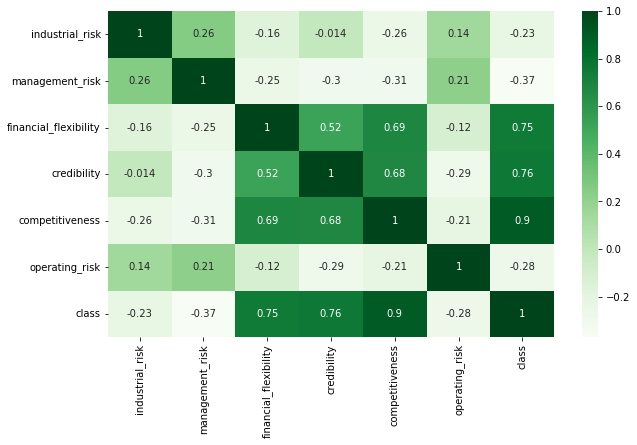

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(bank_final.corr(),cbar=True,annot=True,cmap='Greens')
plt.show()

#### From above correlation matrix we can say that:

1.industrial_risk,management_risk, operating_risk are negatively correlated with target variable.

2.financial_flexibility, credibility, competitiveness are positively correlated with target variable.

3.competitiveness is highly correlated with target varable.

## Boxplot 

<AxesSubplot:xlabel='class', ylabel='competitiveness'>

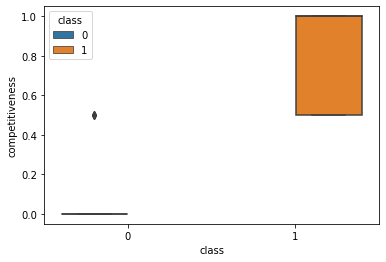

In [20]:
sns.boxplot(x='class',y='competitiveness',hue='class',data=bank_final)

<AxesSubplot:>

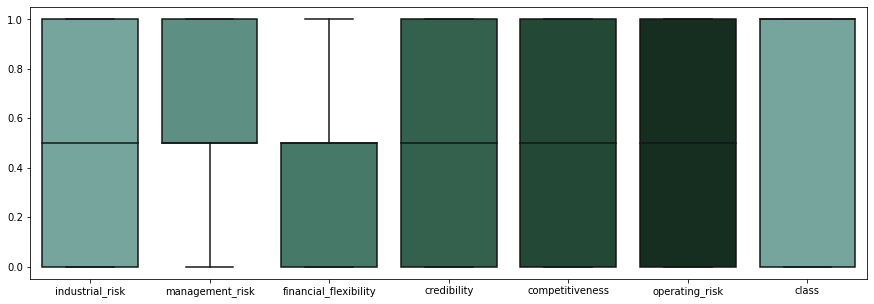

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(data = bank_final, palette=sns.color_palette("ch:2,r=.2,l=.6"))

## Countplot for class

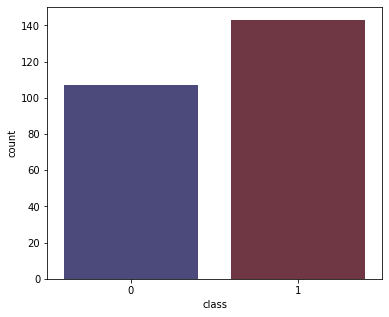

In [22]:
plt.figure(figsize=(6,5))
sns.countplot(x=bank_final['class'], palette='icefire', linewidth=5)
plt.show()

## Countplot

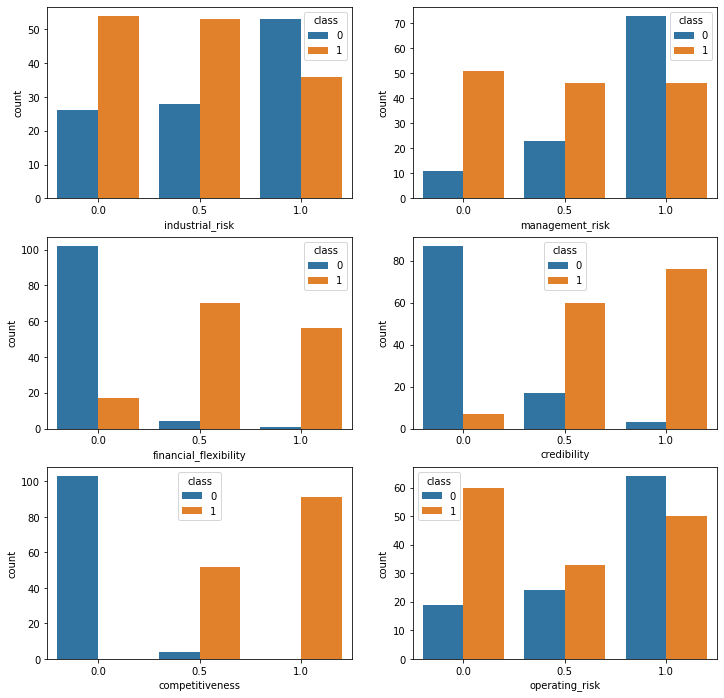

In [23]:
plt.figure(figsize=(12, 12))
for i, predictor in enumerate(bank_final.drop(columns = ['class'])):
    ax = plt.subplot(3, 2, i + 1)
    sns.countplot(data=bank_final, x=predictor, hue='class')
plt.show()

## Piechart

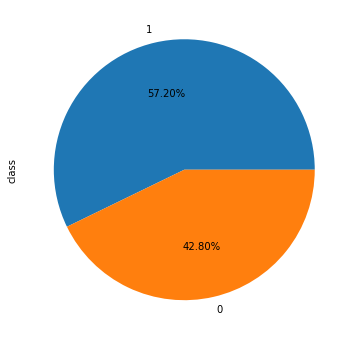

In [24]:
plt.figure(figsize=(12,6))
bank_final['class'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.show()

## Pairplot

<Figure size 1440x3600 with 0 Axes>

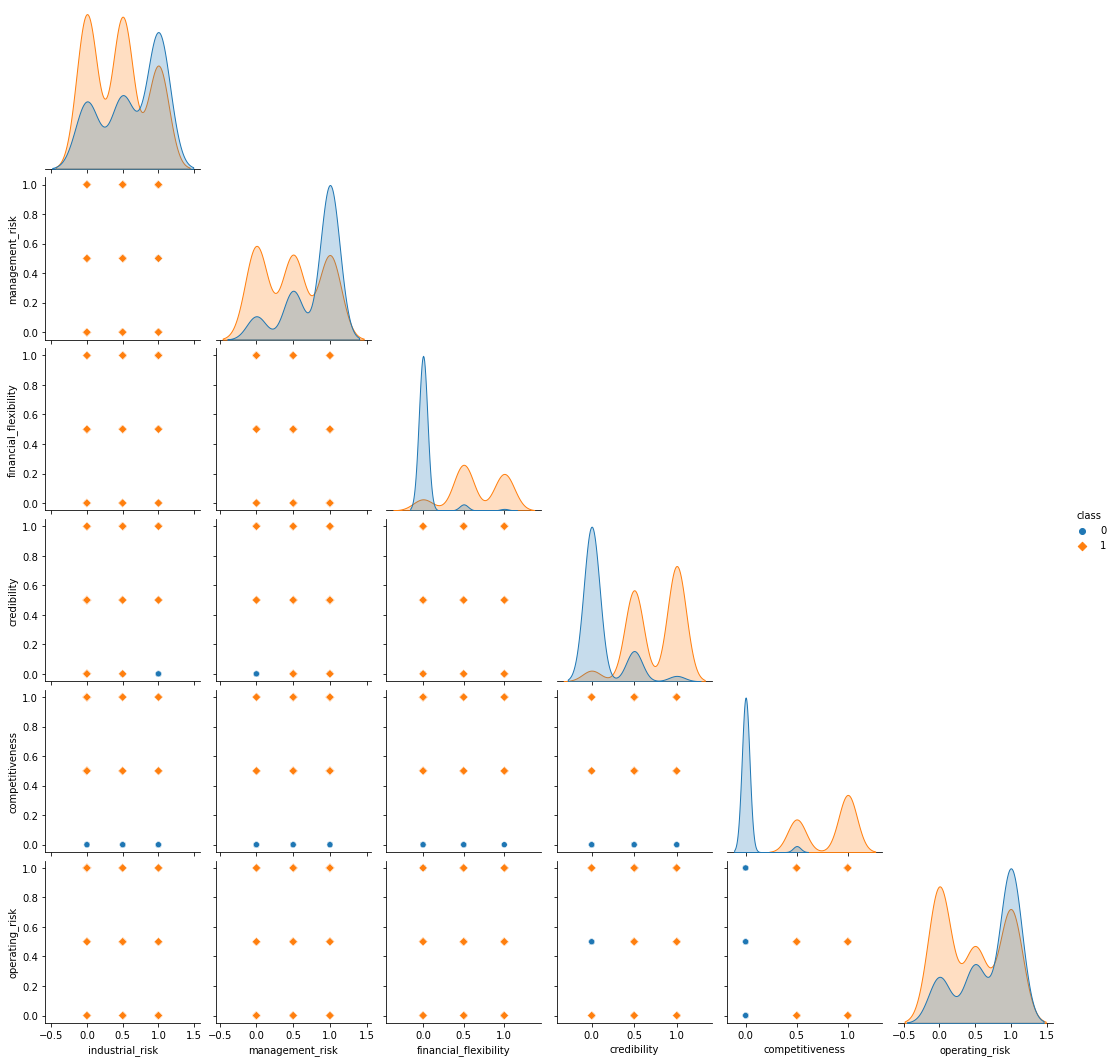

In [25]:
plt.figure(figsize=(20,50))
sns.pairplot(data = bank_final, hue = 'class', markers=['o', 'D'], corner=True)
plt.show()

In [26]:
bank_final[bank_final.competitiveness==0]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
101,1.0,1.0,0.0,0.5,0.0,1.0,0
102,1.0,1.0,0.5,0.0,0.0,1.0,0
103,0.0,1.0,0.0,0.0,0.0,1.0,0
104,0.5,1.0,0.0,0.0,0.0,1.0,0


In [27]:
bank_final[bank_final.competitiveness==0.5]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
14,0.0,1.0,0.0,0.0,0.5,0.5,0
48,0.0,1.0,0.0,0.0,0.5,0.5,0
49,0.0,1.0,0.0,0.0,0.5,0.5,0
106,0.0,1.0,0.0,0.0,0.5,0.5,0
107,0.0,0.0,0.5,0.5,0.5,0.0,1
108,1.0,1.0,0.5,0.5,0.5,1.0,1
109,0.5,0.5,0.5,0.5,0.5,0.5,1
114,0.0,0.0,1.0,0.5,0.5,0.0,1
115,0.0,0.0,0.5,1.0,0.5,0.0,1
117,0.0,0.0,1.0,1.0,0.5,0.0,1


from above output we can see that there is a value where competiveness is 0.5 but still it is bankrupt so we need other variables also for prediction.

but we can say that competitiveness plays an important role for our prediction.

# Balancing Dataset

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

In [28]:
bank_final['class'].value_counts()

1    143
0    107
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

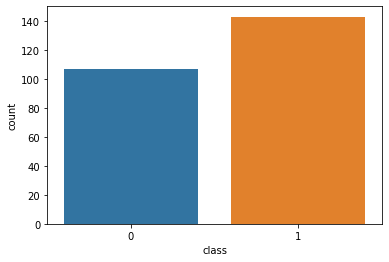

In [29]:
sns.countplot(bank_final['class'])

It shows that our data is imbalance. So, we will try to upsample the data so that both classes match with one another.

In [30]:
X,Y = bank_final.iloc[:,:-1],bank_final.iloc[:,-1]

In [31]:
X.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [32]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

# Under Sampling for Balancing the Dataset

Undersampling is a technique used in imbalanced classification problems to balance the class distribution by reducing the number of instances in the majority class. In such problems, one class (the majority class) has significantly more instances than the other class (the minority class), which can lead to biased models. Undersampling aims to address this issue by removing some instances from the majority class so that the class distribution becomes more balanced.

In [33]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
from tqdm import tqdm
import imblearn
from imblearn.under_sampling import RandomUnderSampler

under_sampling = RandomUnderSampler()
X_under, y_under = under_sampling.fit_resample(X, Y)

In [35]:
X_under.shape, y_under.shape, y_under.value_counts()

((214, 6),
 (214,),
 0    107
 1    107
 Name: class, dtype: int64)

<AxesSubplot:xlabel='class', ylabel='count'>

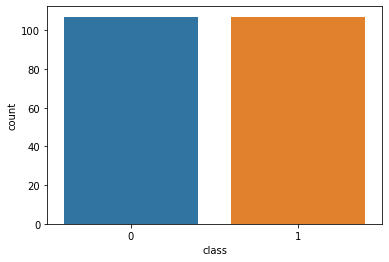

In [36]:
sns.countplot(x = y_under)

In [37]:
bank_undersampled = pd.DataFrame(data = X_under)
bank_undersampled['class'] = y_under

bank_undersampled.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


# Over Sampling(SMOT) for balancing the dataset
SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method used to balance the class distribution in imbalanced datasets. It works by generating synthetic samples for the minority class by interpolating between existing instances. This helps improve the representation of the minority class without discarding any data.

In [38]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

smote = SMOTE()
X_over, y_over = smote.fit_resample(X, Y)

In [39]:
y_over.value_counts()

0    143
1    143
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

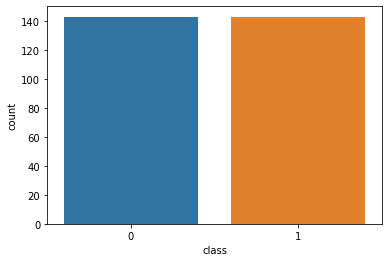

In [40]:
sns.countplot(x = y_over)

In [41]:
bank_oversampled = pd.DataFrame(data = X_over)
bank_oversampled['class'] = y_over

bank_oversampled.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


So we performed various EDA methods and try to get as much as possible from the dataset.

#### 1.There was a serious problem with duplicate values but we removed them.

#### 2.We use LableEncoder for encoding the categorical variable

#### 3.'0' is used for Bankrupt and '1' is for non-bankrupt

#### 4.The dataset was unbalance so we choose the oversampling.

#### 5.The bank_final dataset will be used for model building.

# Model Selection

Model selection is the process of choosing the best algorithm or machine learning model to solve a specific problem. It involves selecting the appropriate algorithm, tuning hyperparameters, and evaluating the model's performance to ensure that it generalizes well to new, unseen data. The goal of model selection is to create a model that effectively captures the underlying patterns in the data and makes accurate predictions.

Here we are going to split the data and use it for selecting best model on basis on accuracy score

In [42]:
y=bank_final['class']
x=bank_final.drop(['class'],axis=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.60,random_state=10)
X_train.shape,y_train.shape
X_test.shape,y_test.shape

((150, 6), (150,))

In [44]:
#Feature Scaling by Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train ,X_test

(array([[-1.19190632,  0.87210285, -0.91457444, -1.0972613 , -1.0533246 ,
          1.        ],
        [ 0.01203946,  0.87210285, -0.91457444,  1.36849443,  1.18779157,
         -0.11111111],
        [ 1.21598523,  0.87210285, -0.91457444,  0.13561657, -1.0533246 ,
         -0.11111111],
        [-1.19190632, -0.33915111,  1.59110895, -1.0972613 ,  1.18779157,
          1.        ],
        [ 1.21598523,  0.87210285, -0.91457444,  0.13561657, -1.0533246 ,
         -1.22222222],
        [-1.19190632, -0.33915111,  0.33826726,  1.36849443,  1.18779157,
         -1.22222222],
        [-1.19190632, -0.33915111, -0.91457444, -1.0972613 , -1.0533246 ,
         -0.11111111],
        [-1.19190632, -1.55040507,  0.33826726,  1.36849443,  0.06723349,
         -1.22222222],
        [ 0.01203946,  0.87210285, -0.91457444, -1.0972613 , -1.0533246 ,
          1.        ],
        [ 0.01203946, -0.33915111,  1.59110895,  1.36849443,  1.18779157,
         -0.11111111],
        [-1.19190632,  0.87210

In [45]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [46]:
model= ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.02151906 0.03130622 0.21254846 0.26093321 0.44842174 0.0252713 ]


In [47]:
d=pd.DataFrame({'Features':x.columns,'score':model.feature_importances_})
d

,Features,score
0,industrial_risk,0.021519
1,management_risk,0.031306
2,financial_flexibility,0.212548
3,credibility,0.260933
4,competitiveness,0.448422
5,operating_risk,0.025271


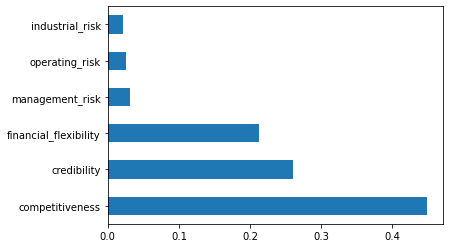

In [48]:
Feature = pd.Series(model.feature_importances_, index = x.columns)
Feature.nlargest(6).plot(kind = 'barh')
plt.show()

<AxesSubplot:>

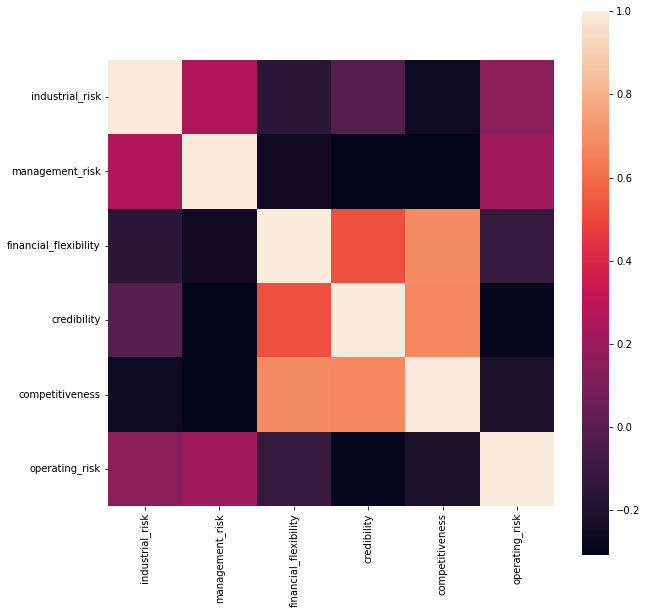

In [49]:
plt.figure(figsize=(10,10))
corrmat = df.corr()
sns.heatmap(corrmat, vmax=1.0, square=True)

# 1.Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, auc, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import roc_curve

In [51]:
# performing logistic regression
logmodel=LogisticRegression()

In [52]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred=logmodel.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [54]:
#classification Report
acc1 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc1)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.99      1.00      0.99        86

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy = 0.9933333333333333


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

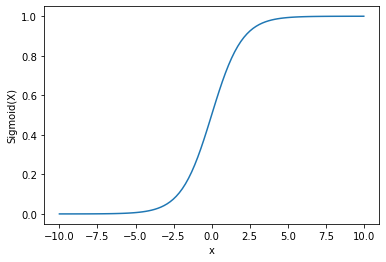

In [56]:
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

Text(0.5, 14.09375, 'Predicted label')

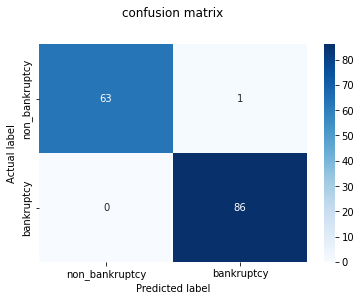

In [57]:
#Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
class_label = ["non_bankruptcy", "bankruptcy"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# 2.Support Vector Machine

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [59]:
clf = SVC()

kernel: 'poly'
parameters ={'kernel':['rbf'],
              'gamma':[100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
               'C':[50, 15, 10, 6, 5, 0.1, 0.001, 0.0001]}

gsv = GridSearchCV(clf, param_grid = parameters, cv=10)

gsv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 15, 10, 6, 5, 0.1, 0.001, 0.0001],
                         'gamma': [100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
                         'kernel': ['rbf']})

In [60]:
gsv.best_params_

{'C': 50, 'gamma': 0.5, 'kernel': 'rbf'}

In [61]:
gsv.best_score_

1.0

In [62]:
model = SVC(C = 50, gamma =0.5, kernel='rbf')
model.fit(X_train , y_train)

SVC(C=50, gamma=0.5)

In [63]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [64]:
from sklearn.calibration import CalibratedClassifierCV
svm = SVC(C = 50, gamma = 0.5)
clf = CalibratedClassifierCV(svm)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:,1]

In [65]:
#predict probab estimates
y_prob

array([0.44278898, 0.93895867, 0.58298901, 0.91657528, 0.55516063,
       0.94213701, 0.80488002, 0.08991626, 0.8997386 , 0.55516063,
       0.91782282, 0.88213183, 0.88076052, 0.94784409, 0.07227991,
       0.92371332, 0.09077767, 0.94774812, 0.87711955, 0.07562688,
       0.07458243, 0.92675729, 0.91890202, 0.94948411, 0.92675729,
       0.07009041, 0.14956357, 0.34287766, 0.92698226, 0.09319516,
       0.93877031, 0.94133543, 0.58298901, 0.93895867, 0.88213183,
       0.1063326 , 0.9436124 , 0.07458243, 0.07227991, 0.08799192,
       0.12474523, 0.93093454, 0.09223263, 0.92698226, 0.94481307,
       0.09319516, 0.92237   , 0.94481307, 0.94280356, 0.0736682 ,
       0.88261955, 0.08676079, 0.84288993, 0.08676079, 0.1063326 ,
       0.94976784, 0.92333025, 0.92162047, 0.58298901, 0.08799192,
       0.87711955, 0.07009041, 0.9080595 , 0.95973251, 0.09077767,
       0.92237   , 0.07024935, 0.85078902, 0.09319516, 0.94519055,
       0.14956357, 0.07024935, 0.92833932, 0.93117245, 0.08991

In [66]:
acc2 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc2)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        64
           1       0.91      1.00      0.96        86

    accuracy                           0.95       150
   macro avg       0.96      0.94      0.94       150
weighted avg       0.95      0.95      0.95       150

Accuracy = 0.9466666666666667


Text(0.5, 14.09375, 'Predicted label')

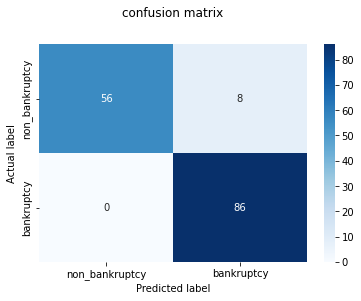

In [67]:
#Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
class_label = ["non_bankruptcy", "bankruptcy"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for logistic regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# 3.Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [70]:
final_model = grid_search.best_estimator_
final_model


DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='auto',
                       random_state=1024)

In [71]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5, max_features='auto', random_state=1024)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_features='auto', random_state=1024)

In [72]:
#Predicting on test data
y_pred = dt_model.predict(X_test) # predicting on test data set 
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [73]:
y_prob=dt_model.predict_proba(X_test)[:,1]
y_prob

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.])

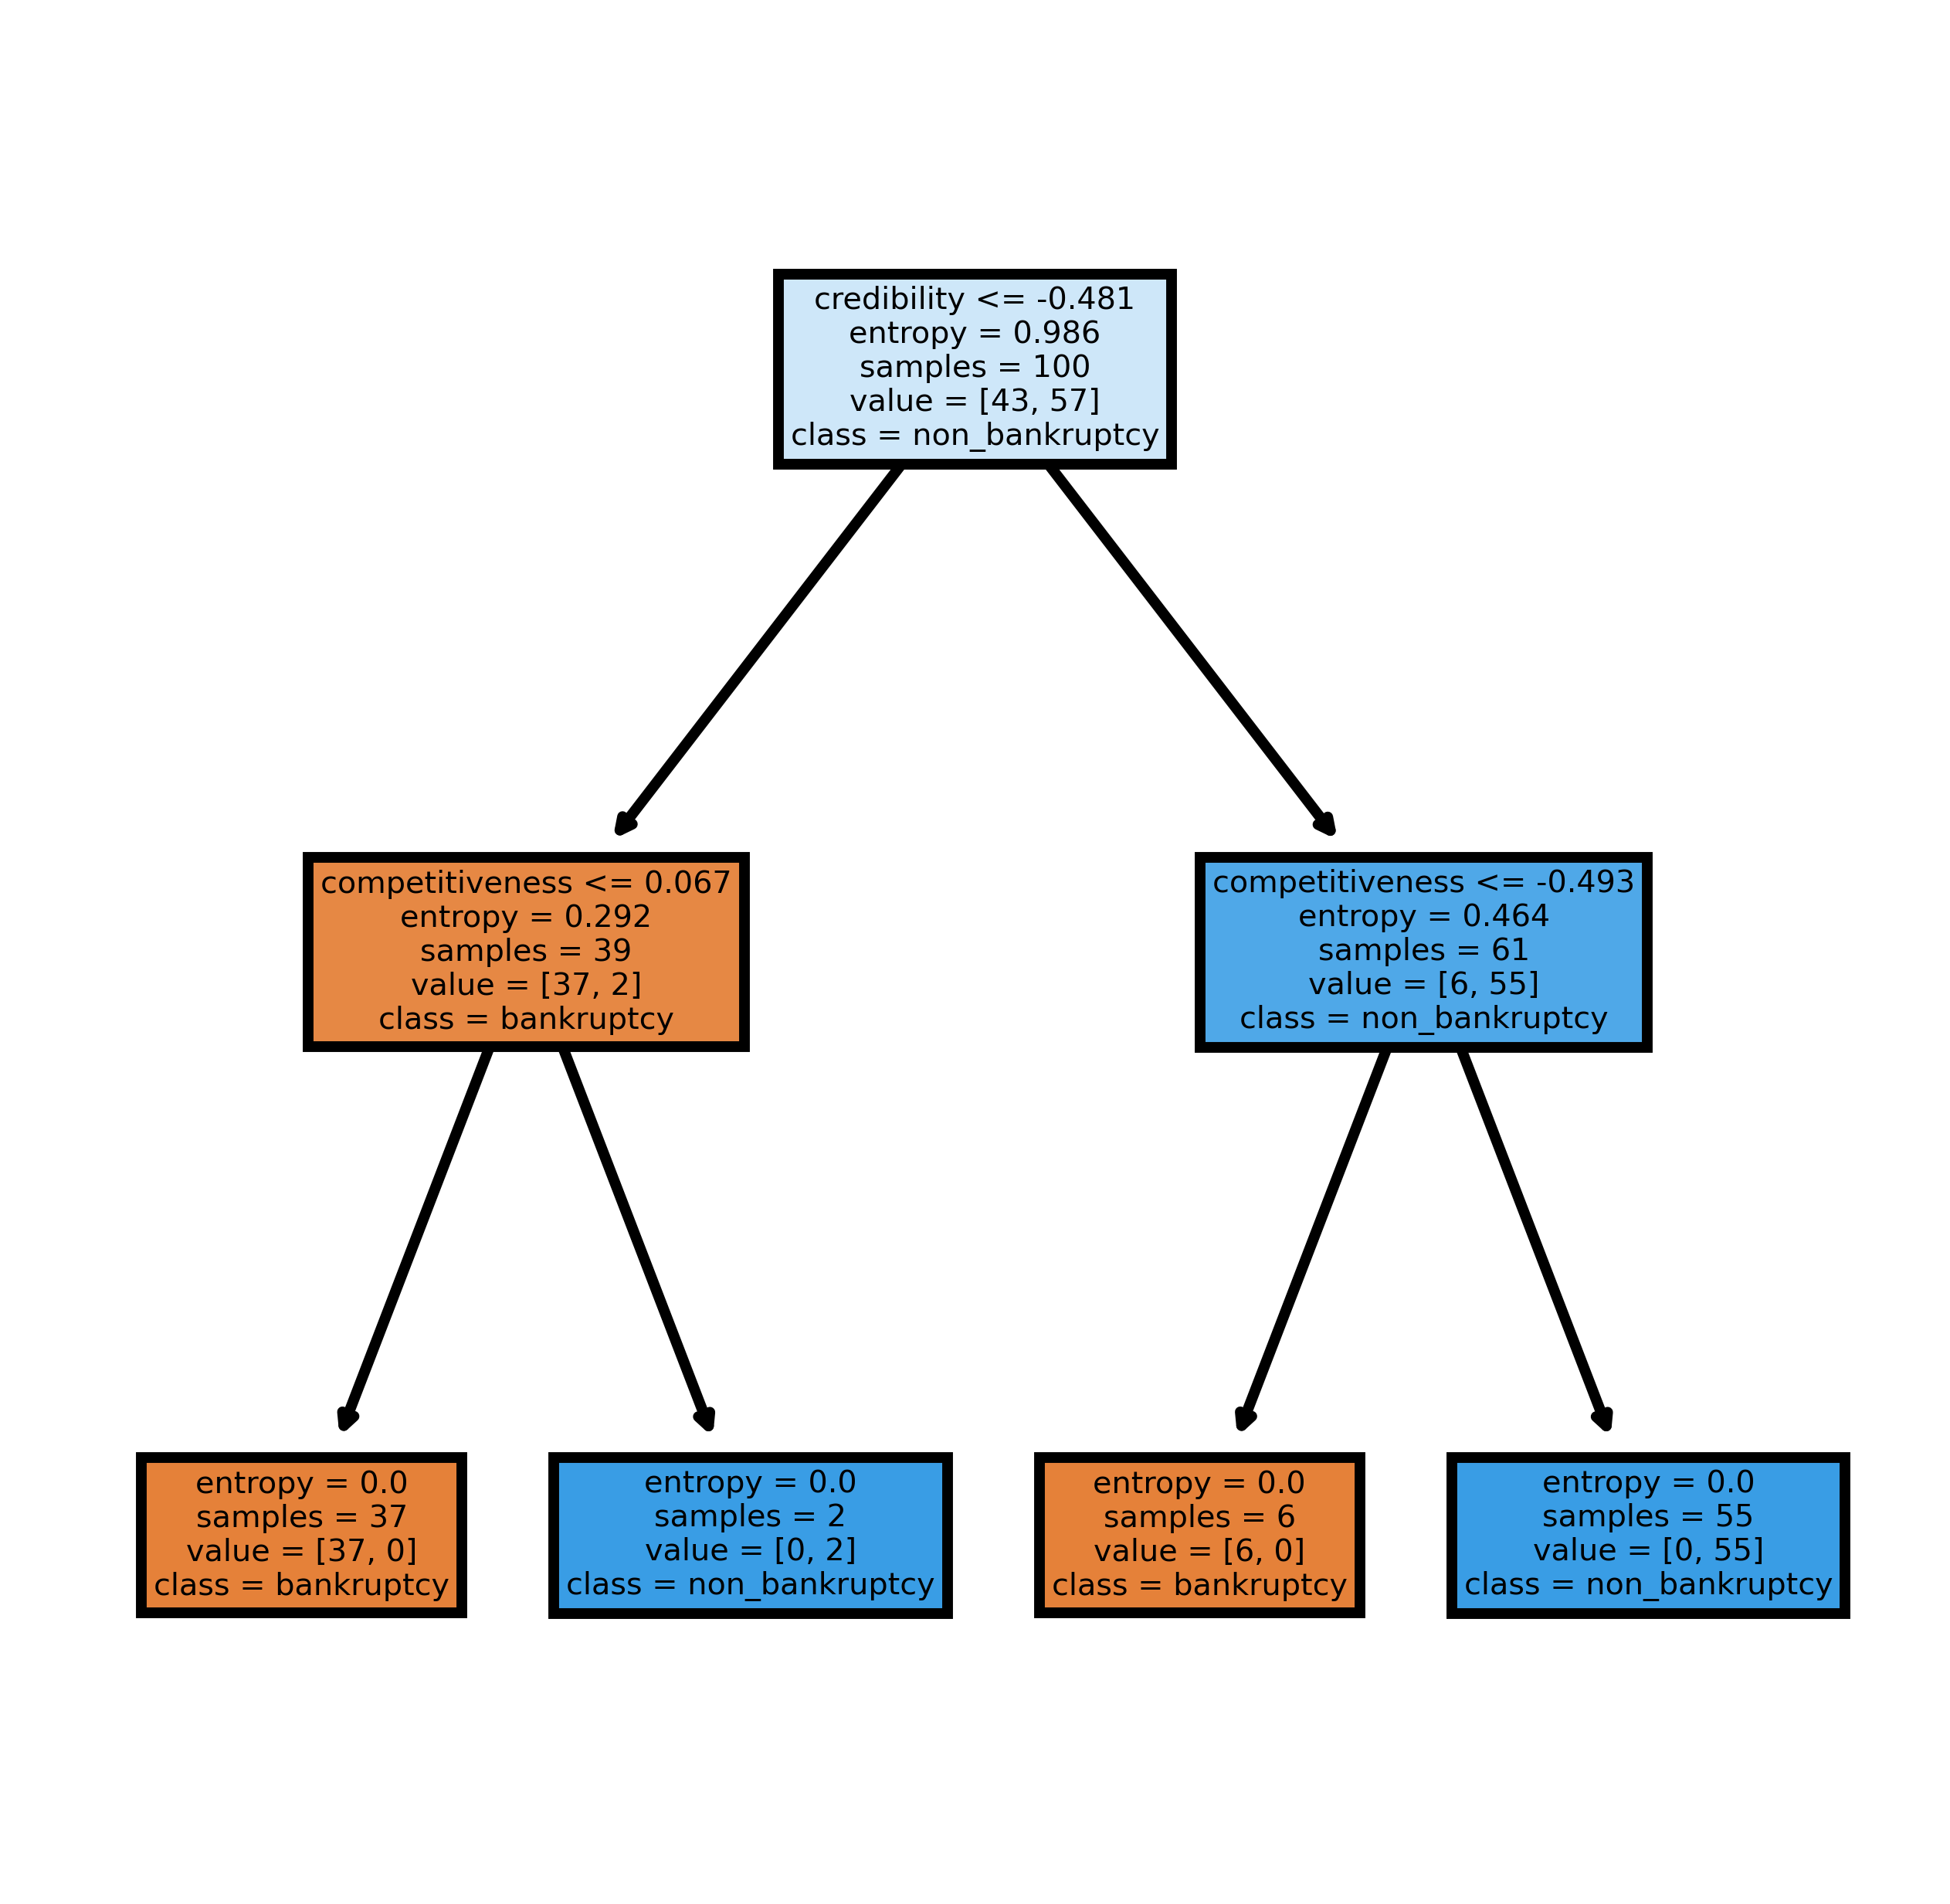

In [74]:
fn=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk','class']
cn=['bankruptcy','non_bankruptcy']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)
plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [75]:
acc3 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc3)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       1.00      0.99      0.99        86

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy = 0.9933333333333333


Text(0.5, 14.09375, 'Predicted label')

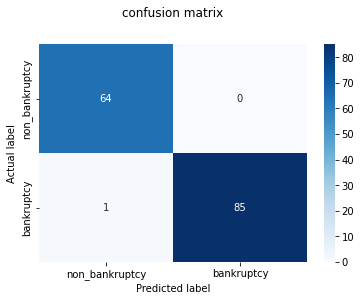

In [76]:
#Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
class_label = ["non_bankruptcy", "bankruptcy"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for Decision Tree ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# 4.Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc=RandomForestClassifier(random_state=42)

In [79]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [80]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [81]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [82]:
rfc_model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=4, 
                                   criterion='gini')

In [83]:
rfc_model

RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=500,
                       random_state=42)

In [84]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=500,
                       random_state=42)

In [85]:
#Predicting on test data
y_pred = rfc_model.predict(X_test) # predicting on test data set 
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [86]:
acc4 = accuracy_score(y_test, y_pred)
print('Classification Report : \n',classification_report(y_test, y_pred))
print('='*50)
print('Accuracy =',acc4)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        86

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Accuracy = 1.0


Text(0.5, 14.09375, 'Predicted label')

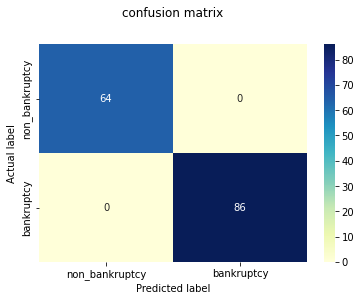

In [87]:
#Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
class_label = ["non_bankruptcy", "bankruptcy"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='YlGnBu')
plt.title('Confusion matrix for Logistic Regression ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# 5.K-nearest Neighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [90]:
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [91]:
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [92]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [93]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [94]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [95]:
#Predicting on test data
y_pred = knn_model.predict(X_test) # predicting on test data set 
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [96]:
y_prob=knn_model.predict_proba(X_test)[:,1]
y_prob

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.])

In [97]:
acc5 = accuracy_score(y_test,y_pred)
print('Classification Report : \n',classification_report(y_test,y_pred))
print('='*50)
print('Accuracy =',acc5)
print('='*50)

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.99      1.00      0.99        86

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Accuracy = 0.9933333333333333


Text(0.5, 14.09375, 'Predicted label')

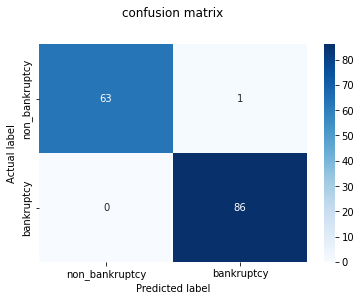

In [98]:
#Confusion Matrix 
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
class_label = ["non_bankruptcy", "bankruptcy"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Blues')
plt.title('Confusion matrix for KNN ', fontsize = 20);
plt.title("confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# • AdaBoost

In [99]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a base estimator (Decision Tree with max_depth=1)
base_estimator = DecisionTreeClassifier(max_depth=1)
# It helps adaboost to create strong model
# adaboost provide default base estimator.
# But providing a custom base estimator allows you to fine-tune the ensemble to better suit your problem.

# Create an AdaBoostClassifier using the base estimator
adaboost_model = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=100,  # Number of weak learners (base classifiers)
    learning_rate=1.0,  # Step size for adjusting the weights of misclassified samples
    random_state=42
)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost_model.predict(X_test)
     


In [101]:
print(classification_report(y_test, y_pred))
print("="*60)
acc6 = accuracy_score(y_test,y_pred)
print("Accuracy Score",acc6)
print("="*60)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        64
           1       0.96      1.00      0.98        86

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Accuracy Score 0.9733333333333334


# • XGBoost

In [102]:
!pip install xgboost

In [103]:
from sklearn import svm
from xgboost import XGBClassifier

In [104]:
xgboost_model_1 = XGBClassifier(n_estimators = 100, max_depth = 5,
                    reg_lambda = 0.1, use_label_encoder= False)
xgboost_model_1.fit(X_train, y_train, eval_metric = 'logloss')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [105]:
y_pred =  xgboost_model_1.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [106]:
xgboost_model_1.score(X_train,y_train)

1.0

In [107]:
xgboost_model_1.score(X_test,y_test)

0.9733333333333334

In [108]:
print(classification_report(y_test, y_pred))
print("="*60)
acc7 = accuracy_score(y_test,y_pred)
print("Accuracy Score",acc7)
print("="*60)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        64
           1       0.96      1.00      0.98        86

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Accuracy Score 0.9733333333333334


# • Bagging

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [110]:
bagging_clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,max_features=5,random_state=42)

In [111]:
bagging_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=5,
                  n_estimators=50, random_state=42)

In [112]:
print(classification_report(y_test, y_pred))
print("="*60)
print('Accuracy Score :',bagging_clf.score(X_test,y_test))
print("="*60)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        64
           1       0.96      1.00      0.98        86

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Accuracy Score : 0.9733333333333334


# • Stacking

In [113]:
import numpy as np
import warnings
from mlxtend.classifier import StackingClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')

In [114]:
clf1=KNeighborsClassifier(n_neighbors=1)
clf2=RandomForestClassifier(random_state=1)
clf3=GaussianNB()
lr=LogisticRegression()
sclf=StackingClassifier(classifiers=[clf1,clf2,clf3],use_probas=True,meta_classifier=lr)
sclf

StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=1),
                                RandomForestClassifier(random_state=1),
                                GaussianNB()],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [115]:
# Train the stacking classifier on the training data
sclf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = sclf.predict(X_test)

# Calculate Classification report
print(classification_report(y_test, y_pred))
print("="*60)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("="*60)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.95      1.00      0.97        86

    accuracy                           0.97       150
   macro avg       0.97      0.96      0.97       150
weighted avg       0.97      0.97      0.97       150

Accuracy: 0.9666666666666667


In [116]:
print('3-fold cross validation:\n')

for clf,label in zip([clf1,clf2,clf3,sclf],['KNN','Random_forest','Naive_bayes','StackingClassifier']):
    scores=model_selection.cross_val_score(clf,X_train,y_train,cv=3,scoring='f1_macro')
    print("f1 Scores:%0.2f (+/- %0.2f)[%s]"%(scores.mean(),scores.std(),label))

3-fold cross validation:

f1 Scores:1.00 (+/- 0.00)[KNN]
f1 Scores:1.00 (+/- 0.00)[Random_forest]
f1 Scores:0.99 (+/- 0.01)[Naive_bayes]
f1 Scores:1.00 (+/- 0.00)[StackingClassifier]


In [117]:
data = {"MODEL":pd.Series(["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest",
                           "KNN","ADABOOST","XGBOOST","BAGGING"]),
        "Accuracy":pd.Series([acc1,acc2,acc3,acc4,acc5,acc6,acc7,
bagging_clf.fit(X_train,y_train).score(X_test,y_test)])}
Accuracy_table=pd.DataFrame(data)
Accuracy_table.sort_values(by='Accuracy')

,MODEL,Accuracy
1,Support Vector Machine,0.946667
5,ADABOOST,0.973333
6,XGBOOST,0.973333
7,BAGGING,0.973333
0,Logistic Regression,0.993333
2,Decision Tree,0.993333
4,KNN,0.993333
3,Random Forest,1.000000


# Deployment

Here we deployed the data using Random Forest Model

In [118]:
import pickle

In [119]:
classifier = RandomForestClassifier()  # Instantiate the model
classifier.fit(X_train, y_train)  # Train the model on your data

filename = 'trained_model.sav'
with open(filename, 'wb') as model_file:
    pickle.dump(classifier, model_file)


In [120]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

input_data = [0, 0, 0.5, 0.5, 0.5, 0]

# Convert input data to a numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshape)
print(prediction)

if prediction[0] == 0:
    print('The company is going to bankrupt')
else:
    print('The company is non-bankrupt')


[1]
The company is non-bankrupt
